# Explore here

In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

In [37]:
data = pd.read_csv('/Users/SamuelHollis/Desktop/4GeeksAcademy/20a clase-Arbol_de_Decisión/Arbol_de_Decision_Project/data/raw/data')

In [38]:
df = pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


check duplicados

In [42]:
df.duplicated().sum()

0

chech nulos

In [43]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

check outliers

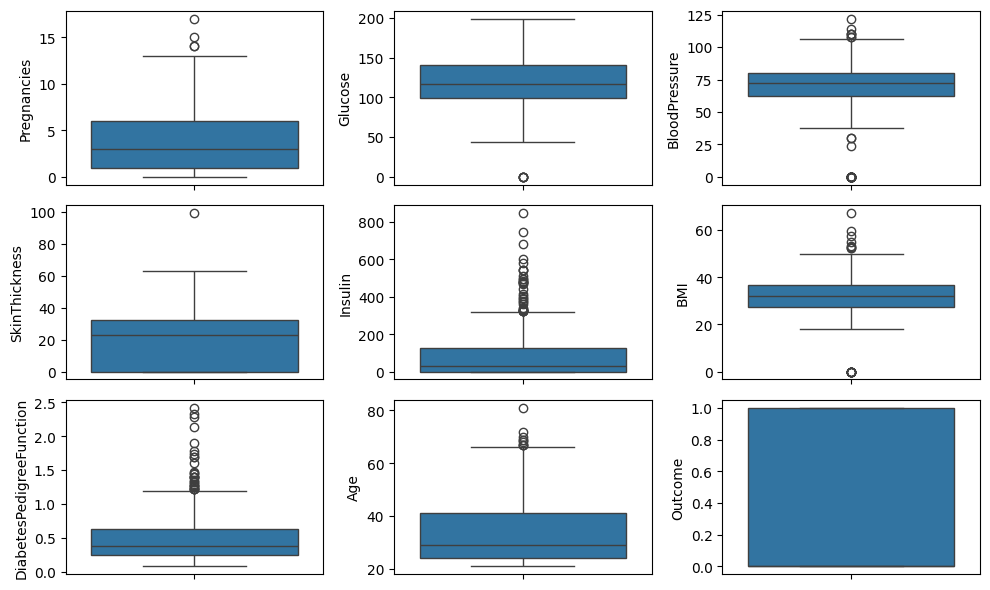

In [44]:
fig, axis = plt.subplots(3, 3, figsize= (10, 6))

sns.boxplot(ax = axis[0, 0], data = df, y = 'Pregnancies')
sns.boxplot(ax = axis[0, 1], data = df, y = 'Glucose')
sns.boxplot(ax = axis[0, 2], data = df, y = 'BloodPressure')
sns.boxplot(ax = axis[1, 0], data = df, y = 'SkinThickness')
sns.boxplot(ax = axis[1, 1], data = df, y = 'Insulin')
sns.boxplot(ax = axis[1, 2], data = df, y = 'BMI')
sns.boxplot(ax = axis[2, 0], data = df, y = 'DiabetesPedigreeFunction')
sns.boxplot(ax = axis[2, 1], data = df, y = 'Age')
sns.boxplot(ax = axis[2, 2], data = df, y = 'Outcome')

plt.tight_layout()
plt.show()



Vemos que en *Glucose*, *Bloodpressure*, *Insulin* y *BMI* hay outliers que pueden ser preocupantes; Comprobamos si es asi y eliminamos is hace falta y no daña el ds

**Glucose**

In [45]:
print((df['Glucose'] == 0).sum())

5


**BloodPressure**

In [46]:
print((df['BloodPressure'] == 0).sum())

35


No elimino los registros porque considero que son demasiados

**Insulin**

In [47]:
print((df['Insulin'] >= 600).sum())

4


**BMI**

In [48]:
print((df['BMI'] == 0).sum())

11


Despues de entrenar el modelo, he visto que estos outliers aportan valor a el mismo. por lo tanto, no los elimino

### Mapa de calor para ver las relaciones

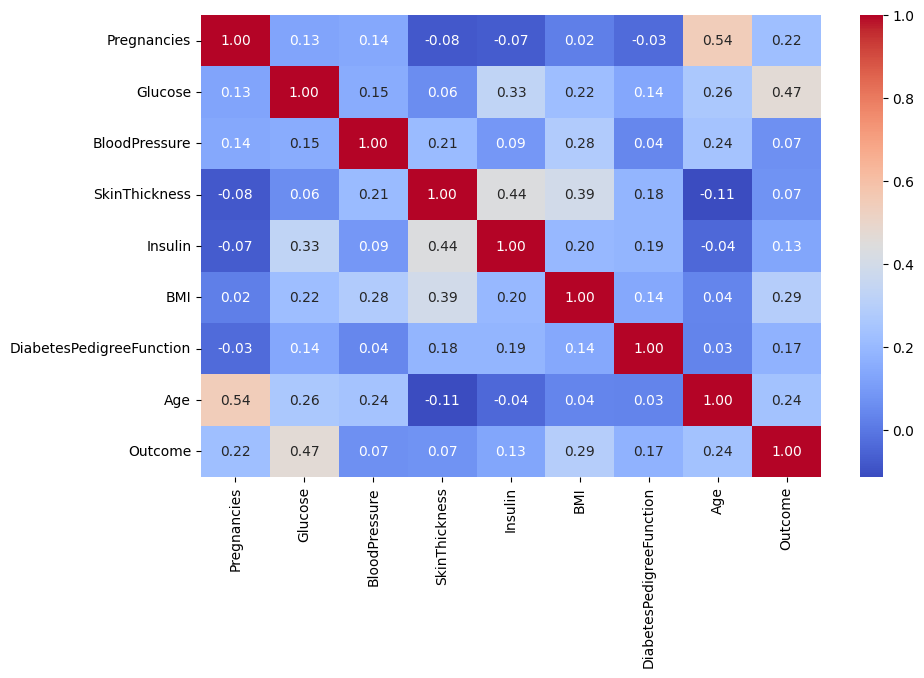

In [49]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear una figura de tamaño adecuado
plt.figure(figsize=(10, 6))

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Mostrar el gráfico
plt.show()

Considero eliminar las dos columnas con menos relacion

In [50]:
df = df.drop(columns='SkinThickness')
df = df.drop(columns='BloodPressure')

despues de varias pruebas, veo que la eliminacion de éstas dos columnas augmenta la precision de mi modelo.

## Separamos en Train y Test

In [51]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0.0,0.304,21
618,9,112,0,28.2,1.282,50
346,1,139,83,28.7,0.654,22
294,0,161,0,21.9,0.254,65
231,6,134,370,46.2,0.238,46


In [52]:
y.unique()

array([1, 0])

## Creamos el modelo de random forest

In [148]:
# instanciamos al modelo

model = RandomForestClassifier(criterion = 'log_loss', max_depth = 10, max_features = 'log2', min_samples_leaf = 4, min_samples_split = 10, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=10, max_features='log2',
                       min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

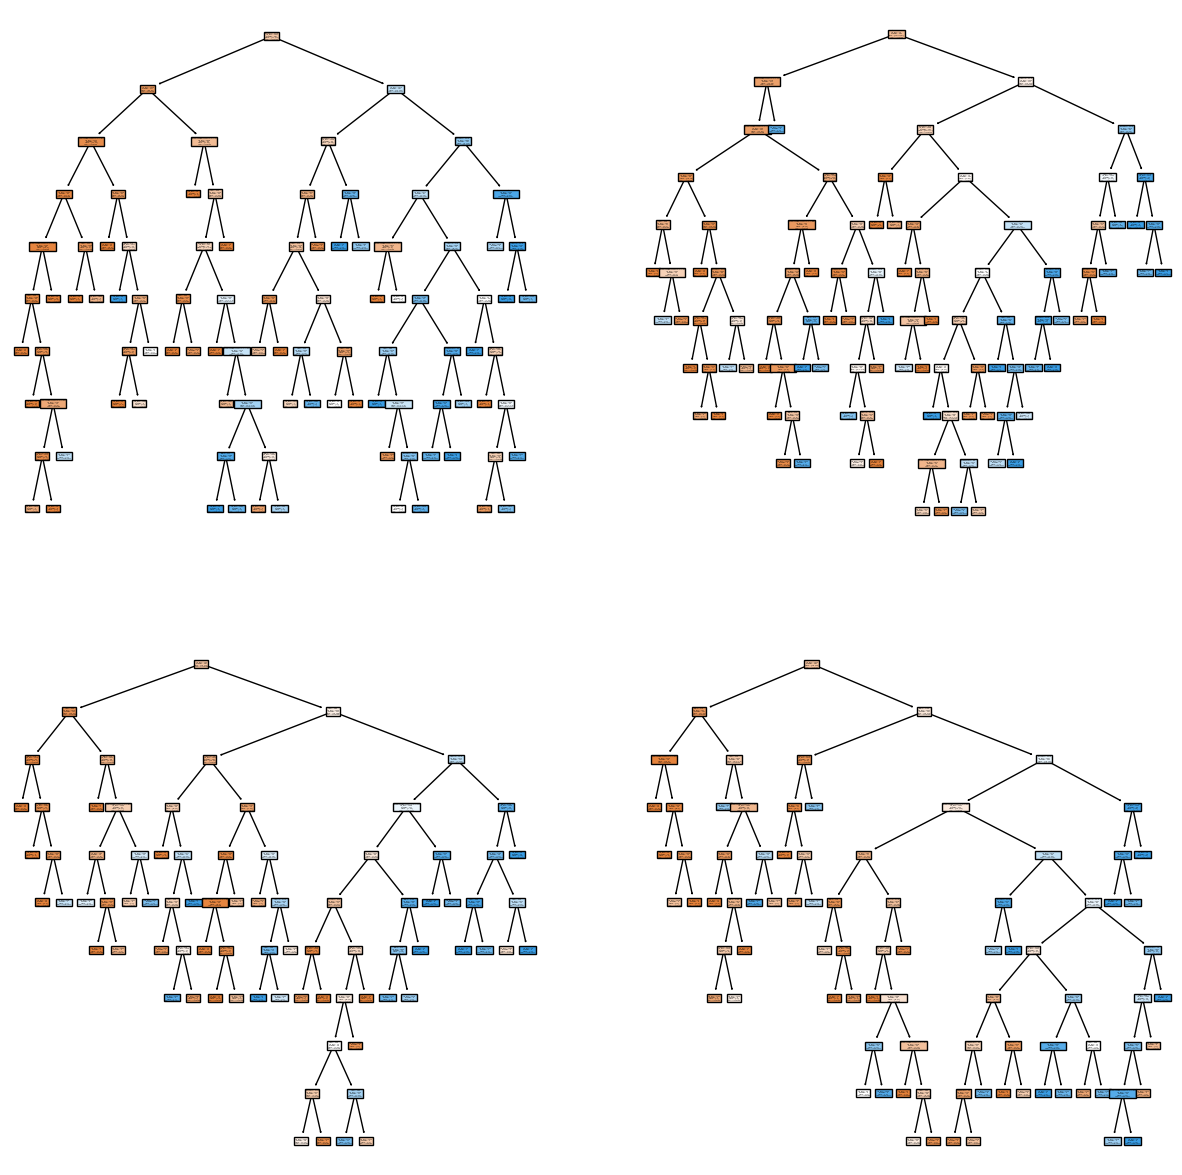

In [154]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
clases = ["iris setosa", "iris versicolor", "iris virginica"]
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)

plt.show()

In [150]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [151]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,

despues de varios intentos de grid_search, no he conseguido encontrar los mejores parametros a que con mi ordenadorme tarda demasiado. los sioguientes resultados son los mejores que he conseguido.

In [152]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7727272727272727
F1 score Test:  0.7727272727272727
Precision Test:  0.7727272727272727
Recall Test:  0.7727272727272727
Accuracy Train:  0.9136807817589576
F1 score Train:  0.9136807817589576
Precision Train:  0.9136807817589576
Recall Train:  0.9136807817589576


In [153]:
dump(model, open("random_forest_regressor_default_42.sav", "wb"))